In [1]:
from projects.NeuralForceField.model_att import *
from projects.NeuralForceField.graphs import * 
from projects.NeuralForceField.train import * 
import numpy as np

In [10]:
# ethanol data 
train = np.load('/home/wwj/data/ethanol_ccsd_t-train.npz')
xyz_data = np.dstack((np.array([train.f.z]*1000).reshape(1000, -1, 1), np.array(train.f.R)))
force_data = train.f.F
energy_data = train.f.E.squeeze()

In [11]:
graph_data = load_graph_data(xyz_data=xyz_data, energy_data=energy_data, batch_size=100, cutoff=5.0,
                             force_data=force_data, au_flag=False, subtract_mean_flag = True)

In [14]:
# initialize parameters
par = dict()

par["n_filters"] = 256
par["n_gaussians"] = 32
par["n_atom_basis"] = 256
par["optim"] = 1e-4
par["scheduler"] = True
par["train_percentage"] = 0.8
par["T"] = 12
par["batch_size"] = 100
par["cutoff"] = 5.0 
par["max_epoch"] = 1000
par["trainable_gauss"] = True
par["rho"] = 0.1
par["eps"] = 1e-5

In [15]:
model = Model_att(par=par, graph_data=graph_data, device=3, job_name="test_att", graph_batching=False, root='./log/')

In [16]:
model.train(500)

/home/wwj/Repo/projects/NeuralForceField/model_att.py:285: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  train_u = train_u_mae.data[0]/self.N_train
/home/wwj/Repo/projects/NeuralForceField/model_att.py:286: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  train_force = train_force_mae.data[0]/self.N_train


epoch 0  U train: 7.207  force train 19.293
epoch 1  U train: 3.377  force train 16.594
epoch 2  U train: 3.654  force train 12.763
epoch 3  U train: 4.403  force train 9.993
epoch 4  U train: 3.389  force train 8.657
epoch 5  U train: 2.364  force train 7.887
epoch 6  U train: 2.451  force train 7.139
epoch 7  U train: 2.401  force train 6.682
epoch 8  U train: 2.399  force train 6.264
epoch 9  U train: 2.093  force train 5.912
epoch 10  U train: 2.724  force train 5.649
epoch 11  U train: 2.546  force train 5.431
epoch 12  U train: 3.244  force train 5.223
epoch 13  U train: 2.347  force train 5.032
epoch 14  U train: 1.724  force train 4.891
epoch 15  U train: 1.876  force train 4.775
epoch 16  U train: 1.678  force train 4.676
epoch 17  U train: 2.122  force train 4.581
epoch 18  U train: 1.598  force train 4.483
epoch 19  U train: 2.004  force train 4.398
epoch 20  U train: 3.820  force train 4.308
epoch 21  U train: 2.109  force train 4.222
epoch 22  U train: 2.051  force train 4

epoch 185  U train: 0.655  force train 1.773
epoch 186  U train: 0.998  force train 1.768
epoch 187  U train: 0.959  force train 1.781
epoch 188  U train: 1.688  force train 1.794
epoch 189  U train: 5.178  force train 1.854
epoch 190  U train: 3.605  force train 1.870
epoch 191  U train: 1.797  force train 1.880
epoch 192  U train: 1.326  force train 1.851
epoch 193  U train: 0.912  force train 1.809
epoch 194  U train: 0.812  force train 1.758
epoch 195  U train: 0.616  force train 1.740
epoch 196  U train: 1.209  force train 1.751
epoch 197  U train: 2.300  force train 1.776
epoch 198  U train: 3.874  force train 1.806
epoch 199  U train: 1.935  force train 1.802
epoch 200  U train: 1.415  force train 1.820
epoch 201  U train: 1.783  force train 1.794
epoch 202  U train: 1.330  force train 1.770
epoch 203  U train: 1.478  force train 1.751
epoch 204  U train: 3.604  force train 1.755
epoch 205  U train: 2.093  force train 1.740
epoch 206  U train: 2.637  force train 1.755
epoch 207 

epoch 368  U train: 0.568  force train 1.376
epoch 369  U train: 0.466  force train 1.389
epoch 370  U train: 0.432  force train 1.398
epoch 371  U train: 2.193  force train 1.424
epoch 372  U train: 5.689  force train 1.485
epoch 373  U train: 2.721  force train 1.512
epoch 374  U train: 2.179  force train 1.463
epoch 375  U train: 0.769  force train 1.414
epoch 376  U train: 0.850  force train 1.393
epoch 377  U train: 0.684  force train 1.364
epoch 378  U train: 0.495  force train 1.363
epoch 379  U train: 0.486  force train 1.353
epoch 380  U train: 0.444  force train 1.344
epoch 381  U train: 0.411  force train 1.335
epoch 382  U train: 0.440  force train 1.335
epoch 383  U train: 0.564  force train 1.347
epoch 384  U train: 0.721  force train 1.362
epoch 385  U train: 0.975  force train 1.374
epoch 386  U train: 1.375  force train 1.377
epoch 387  U train: 1.712  force train 1.385
epoch 388  U train: 0.930  force train 1.404
epoch 389  U train: 2.112  force train 1.400
epoch 390 

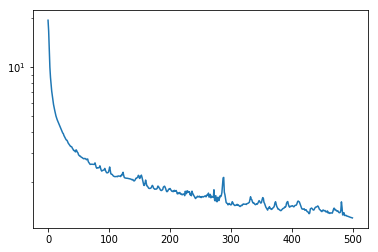

In [17]:
plt.plot(model.train_f_log)
plt.yscale("log")
plt.show()

In [18]:
model = Model(par=par, graph_data=graph_data, device=3, job_name="test_att", graph_batching=False, root='./log/')

In [19]:
model.train(500)

/home/wwj/Repo/projects/NeuralForceField/train.py:198: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  train_u = train_u_mae.data[0]/self.N_train
/home/wwj/Repo/projects/NeuralForceField/train.py:199: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  train_force = train_force_mae.data[0]/self.N_train


epoch 0  U train: 6.697  force train 17.490
epoch 1  U train: 2.730  force train 12.686
epoch 2  U train: 2.756  force train 9.316
epoch 3  U train: 2.525  force train 7.578
epoch 4  U train: 1.809  force train 6.357
epoch 5  U train: 1.685  force train 5.554
epoch 6  U train: 1.453  force train 5.015
epoch 7  U train: 1.374  force train 4.568
epoch 8  U train: 1.238  force train 4.260
epoch 9  U train: 1.477  force train 3.978
epoch 10  U train: 1.780  force train 3.768
epoch 11  U train: 1.487  force train 3.572
epoch 12  U train: 1.381  force train 3.421
epoch 13  U train: 1.870  force train 3.340
epoch 14  U train: 1.832  force train 3.251
epoch 15  U train: 1.422  force train 3.106
epoch 16  U train: 1.283  force train 3.030
epoch 17  U train: 1.591  force train 2.994
epoch 18  U train: 1.812  force train 2.930
epoch 19  U train: 1.473  force train 2.839
epoch 20  U train: 0.934  force train 2.754
epoch 21  U train: 1.133  force train 2.712
epoch 22  U train: 1.642  force train 2.

KeyboardInterrupt: 